# Deep Learning - Classification Example

I demonstrate the use of Deep Learning with Keras. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Data

In [2]:
data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

In [4]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 22 to 102
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [6]:
y_train.value_counts()

1    41
0    40
2    39
Name: target, dtype: int64

# Modelling the Data

In [7]:
n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(50, activation = 'relu'))
# In the last layer (output layer) we have 3 nodes since 3 classes to predict and therefore use softmax. 
model.add(Dense(3, activation = 'softmax'))

If there are two or more label classes represented as a one-hot representation --> Use crossentropy in the compile step. 

If the labels are represented as integers, e.g. [0, 3, 2] --> Use SparseCategoricalCrossentropy in the compile step.

Check documentation: https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class


In [8]:
print(y_train.shape)
print(y_train)

# If we would like to use the CategoricalCrossentropy in the compile step as loss we would simply run this code: 
# y_train = to_categorical(y_train)

(120,)
22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int32


In [9]:
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [10]:
early_stopping_monitor = EarlyStopping(patience = 2)
model_trained = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, callbacks = [early_stopping_monitor])

Epoch 1/100
3/3 [==============================] - 1s 138ms/step - loss: 1.3633 - accuracy: 0.2812 - val_loss: 0.9664 - val_accuracy: 0.7083
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0051 - accuracy: 0.6250 - val_loss: 0.8879 - val_accuracy: 0.7083
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8850 - accuracy: 0.6354 - val_loss: 0.9389 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 0.8410 - accuracy: 0.7188 - val_loss: 0.9537 - val_accuracy: 0.5000


In [11]:
print(model_trained.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


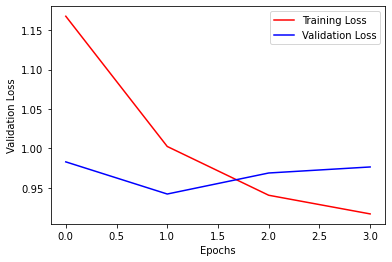

In [12]:
plt.plot(np.sqrt(model_trained.history['loss']), 'r', label='Training Loss')
plt.plot(np.sqrt(model_trained.history['val_loss']), 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

# Evaluating the model on the test data

In [13]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.8894 - accuracy: 0.6333


[0.889392614364624, 0.6333333253860474]